--- Data Scaling Completed ---
              Recency  Frequency  Monetary
Customer ID                               
12346        0.966262   1.613017 -0.540688
12347       -1.900165  -0.394693  0.447651
12348        0.355000  -0.981910 -0.943904
12349       -0.055302   0.021945  0.996204
12351       -1.054928  -0.981910 -0.707671


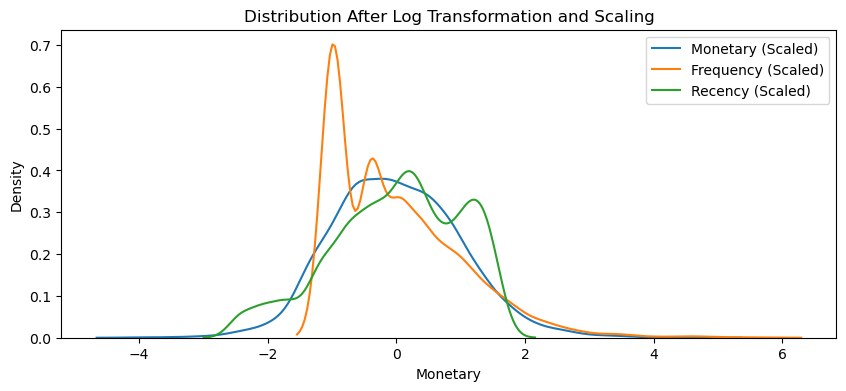

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the RFM data from Week 3
rfm = pd.read_csv('../data/rfm_table.csv', index_col='Customer ID')

# 2. Log Transformation to handle skewness (distribution smoothing)
# We add 1 to avoid issues with log(0)
rfm_log = np.log1p(rfm)

# 3. Standardization (Bringing everything to the same scale)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# 4. Convert back to DataFrame just to check the results
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

print("--- Data Scaling Completed ---")
print(rfm_scaled_df.head())

# Optional: Visualization of the new distribution
plt.figure(figsize=(10, 4))
sns.kdeplot(rfm_scaled_df['Monetary'], label='Monetary (Scaled)')
sns.kdeplot(rfm_scaled_df['Frequency'], label='Frequency (Scaled)')
sns.kdeplot(rfm_scaled_df['Recency'], label='Recency (Scaled)')
plt.title('Distribution After Log Transformation and Scaling')
plt.legend()
plt.show()

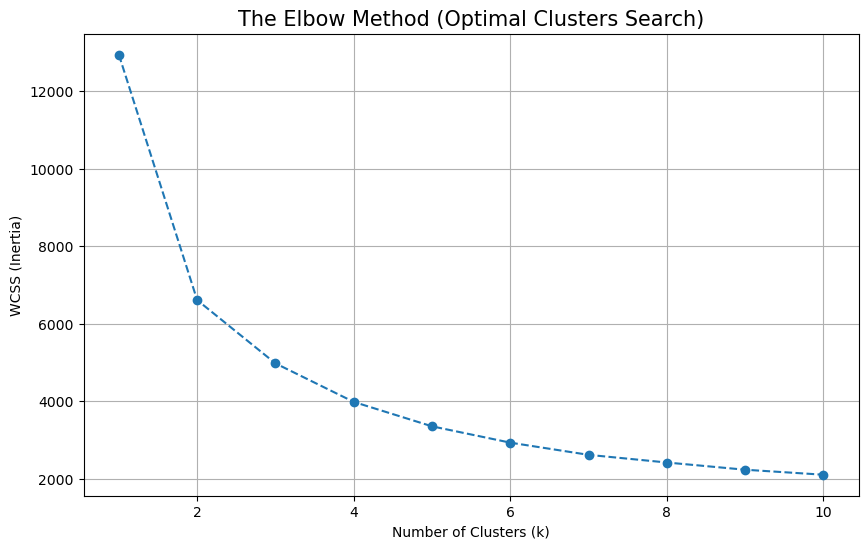

In [2]:
from sklearn.cluster import KMeans

# 1. Calculate WCSS for different number of clusters (1 to 10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled) # We use the scaled data from Step 1
    wcss.append(kmeans.inertia_)

# 2. Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method (Optimal Clusters Search)', fontsize=15)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [3]:
from sklearn.cluster import KMeans

# 1. We choose k=3 based on the Elbow graph
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 2. Analyze the characteristics of each cluster
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

print("--- ML Cluster Characteristics ---")
print(cluster_analysis)

# 3. Save the ML results for the final week
rfm.to_csv('../data/rfm_with_clusters.csv')
print("\n✅ Results saved to '../data/rfm_with_clusters.csv'")

--- ML Cluster Characteristics ---
        Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          18.2      13.2   7213.2   835
1         164.4       1.3    315.4  1699
2          55.5       3.4   1278.5  1778

✅ Results saved to '../data/rfm_with_clusters.csv'


In [4]:
# Cluster nomlarini belgilaymiz
cluster_names = {
    0: 'VIP Customers',
    1: 'At Risk / Lost',
    2: 'Regular / Loyal'
}

rfm['Cluster_Name'] = rfm['Cluster'].map(cluster_names)

# Har bir guruh uchun marketing strategiyasini belgilash
strategies = {
    'VIP Customers': 'Personalized service, Early access to new products, No discounts needed.',
    'At Risk / Lost': 'Win-back campaigns, Massive discounts, Surveys to find why they left.',
    'Regular / Loyal': 'Loyalty programs, Upselling, Moderate discounts to keep them active.'
}

rfm['Marketing_Strategy'] = rfm['Cluster_Name'].map(strategies)

# Yakuniy natijani ko'rish
final_summary = rfm.groupby('Cluster_Name').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Customer_Count'}).round(1)

print("--- Final Business Strategy Summary ---")
print(final_summary)

# Faylni oxirgi marta saqlaymiz
rfm.to_csv('../data/final_customer_insights.csv')
print("\n✅ Final insights saved to '../data/final_customer_insights.csv'")

--- Final Business Strategy Summary ---
                 Recency  Frequency  Monetary  Customer_Count
Cluster_Name                                                 
At Risk / Lost     164.4        1.3     315.4            1699
Regular / Loyal     55.5        3.4    1278.5            1778
VIP Customers       18.2       13.2    7213.2             835

✅ Final insights saved to '../data/final_customer_insights.csv'
